# Iris Flower Classification

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

The three different species of iris flowers are: **Iris Setosa, Iris Versicolour, Iris Virginica**
**Label Encoding Mapping:**`(For Reference)`

- **Iris-setosa:** 0,
- **Iris-versicolor:** 1, 
- **Iris-virginica:** 2

The dataset consists of four features (attributes) measured from each iris flower:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

## 1. Import Necessary Libraries

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

D:\Downloads\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Load the Dataset

In [2]:
# Load the dataset
iris = pd.read_csv("D:\Projects\Dataset\Iris Dataset.csv", encoding = 'latin-1')

## 3. Exploratory Data Analysis (EDA)

### 3.1 Display First Few Rows

In [3]:
pd.set_option('display.max_columns', None)
iris.head() # Display the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3.2 Dataset Overview

In [4]:
iris.shape

(150, 6)

In [5]:
# Display dataset info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Drop unnecessary columns
iris = iris.drop(columns = ['Id'])

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Check for missing values
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Observation: 
There are no null values in the Iris Dataset

In [8]:
# Statistical summary
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [9]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### 3.3 Class Distribution

In [10]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 4. Data Preprocessing

In [12]:
# Encode target labels
label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [13]:
# Display mapping of categorical values to numerical labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

Label Encoding Mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [14]:
# Class Distribution after Encoding
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [15]:
# Split dataset into features and target
X = iris.drop(columns=['Species'])
y = iris['Species']

In [16]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 5. Exploratory Data Analysis (EDA)

### 5.1 Histogram of Features

Histograms show the distribution of a single feature.

A histogram is a graphical representation that shows the distribution of a continuous variable by dividing the data into intervals (bins) and counting the number of data points that fall into each bin.

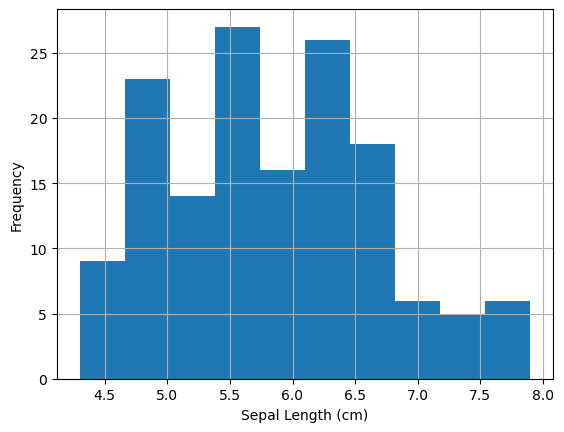

In [19]:
# Histogram of SepalLength Feature
iris['SepalLengthCm'].hist()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

plt.show() # Display the plot

In the above case:

The x-axis of the histogram represents the range of "SepalLengthCm" values.

The y-axis represents the frequency or count of data points falling into each bin or interval on the x-axis.

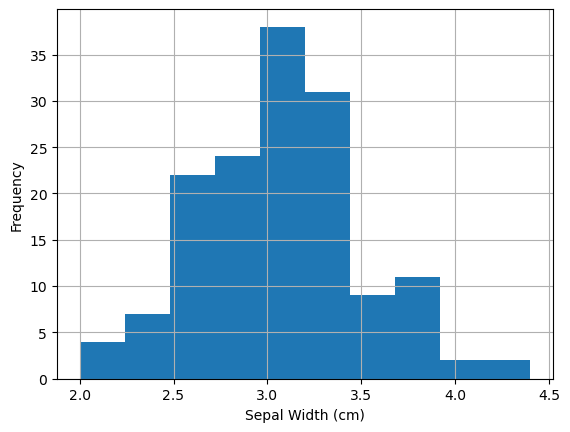

In [20]:
# Histogram of SepalWidth Feature
iris['SepalWidthCm'].hist()
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

plt.show()

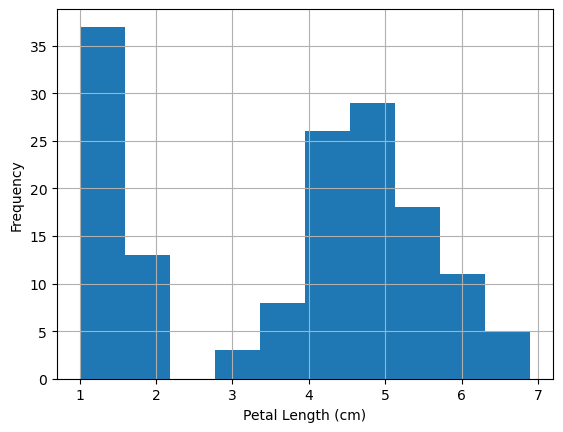

In [21]:
# Histogram of PetalLength Feature
iris['PetalLengthCm'].hist()
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

plt.show()

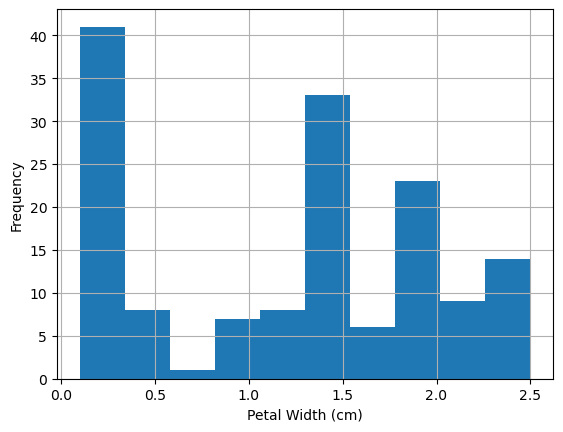

In [22]:
# Histogram of PetalWidth Feature
iris['PetalWidthCm'].hist()
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')

plt.show()

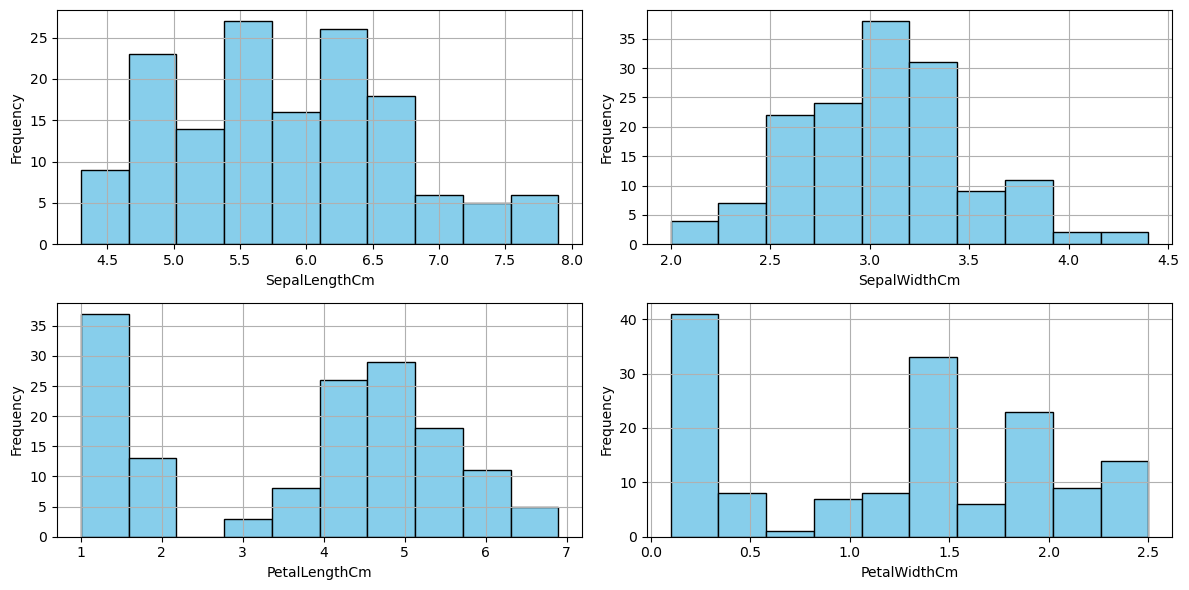

In [23]:
# Histogram of all Features
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    iris[feature].hist(color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### 5.2 Scatterplots for Feature Relationships
A scatter plot is a type of data visualization that shows the relationship between different variables.

**Label Encoding Mapping:**`(For Reference)`

- **Iris-setosa:** 0,
- **Iris-versicolor:** 1, 
- **Iris-virginica:** 2

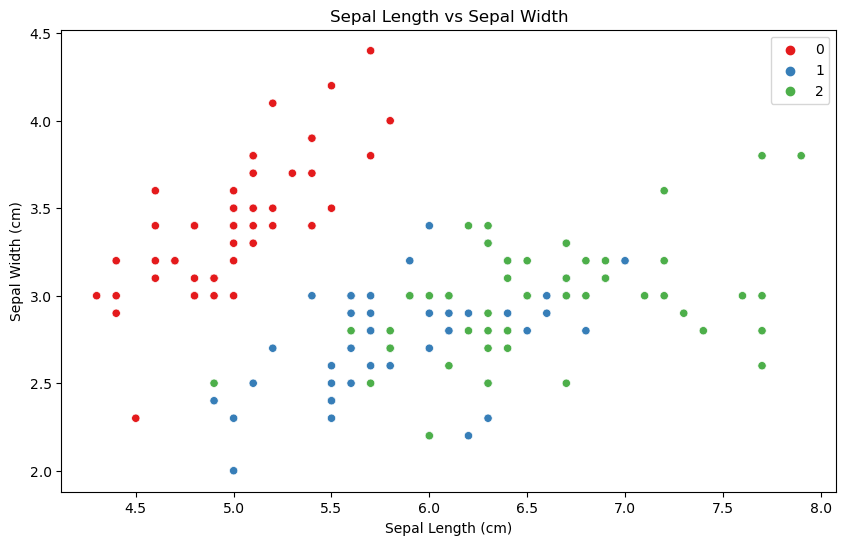

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue=iris['Species'], palette='Set1')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.show()

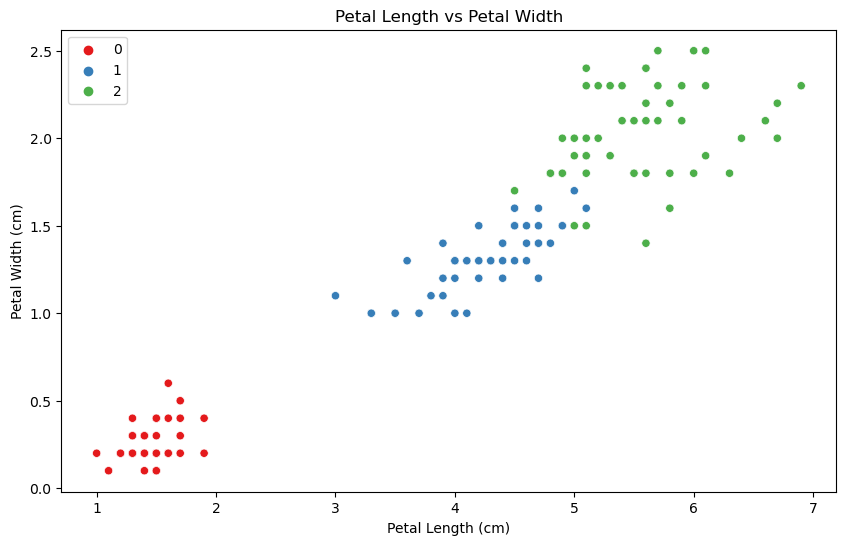

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris['PetalLengthCm'], y=iris['PetalWidthCm'], hue=iris['Species'], palette='Set1')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width")
plt.legend()
plt.show()

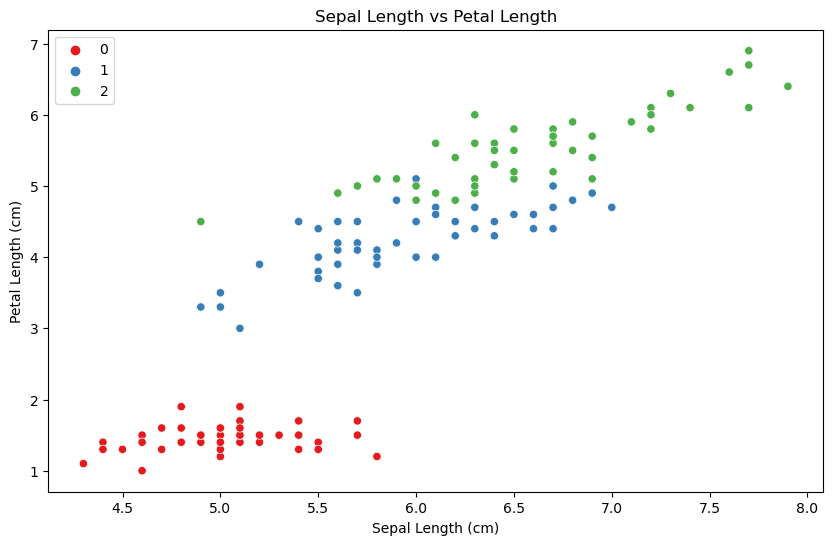

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris['SepalLengthCm'], y=iris['PetalLengthCm'], hue=iris['Species'], palette='Set1')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Sepal Length vs Petal Length")
plt.legend()
plt.show()

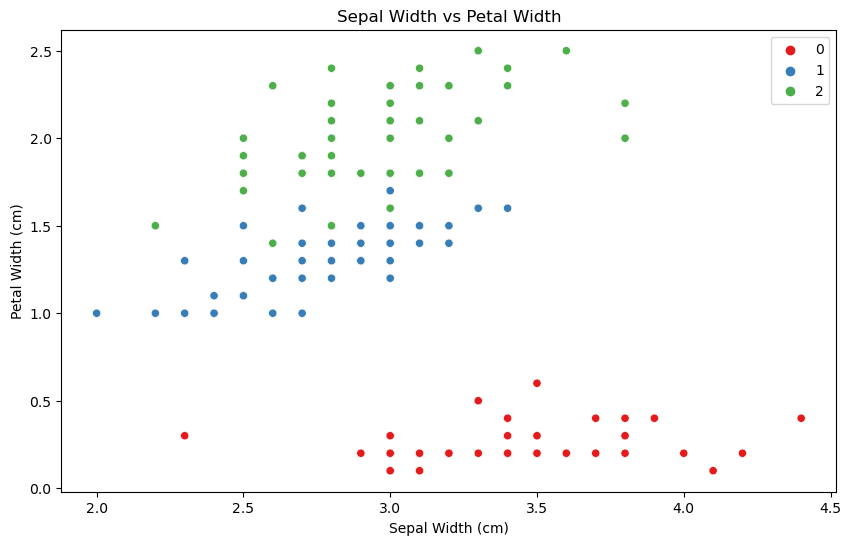

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris['SepalWidthCm'], y=iris['PetalWidthCm'], hue=iris['Species'], palette='Set1')
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Sepal Width vs Petal Width")
plt.legend()
plt.show()

### 5.3 Correlation Matrix

The correlation matrix contains correlation coefficients between all pairs of features. Correlation coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

In [28]:
# Correlation Matrix
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


### 5.4 Correlation Heatmap
A heatmap can show the correlation between different features.

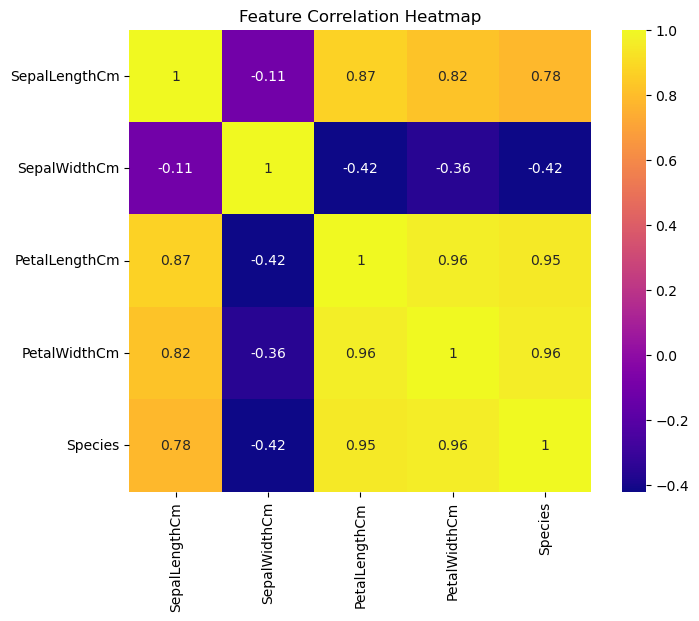

In [29]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = iris.corr() # Correlation Matrix
sns.heatmap(corr, annot=True, cmap='plasma', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

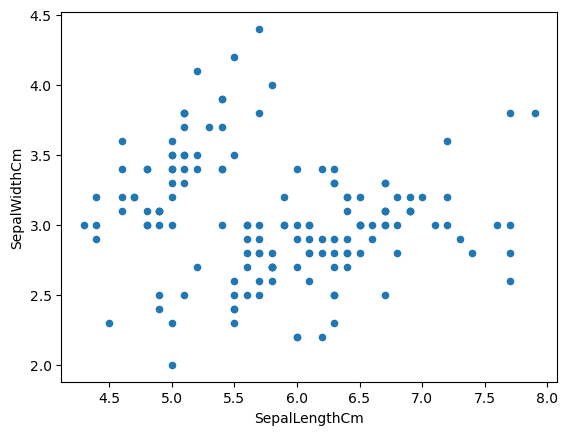

In [30]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

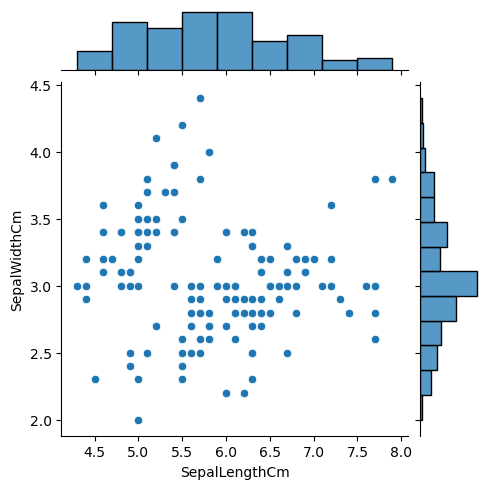

In [31]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=5)

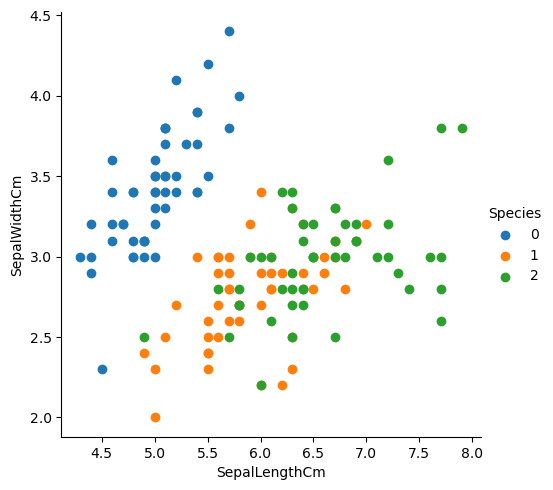

In [32]:
# We'll use seaborn's FacetGrid to color the scatterplot by species (to know  what species each plant is)
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

### 5.5 Pairplot
A pairplot visualizes pairwise relationships between numerical features in a dataset. It helps analyze feature distributions and interactions within different categories.

`sns.pairplot()` is a Seaborn function used for pairwise scatterplots between numerical features. It plots every feature against every other feature in a grid-like structure. This aids in identifying patterns, correlations, and separability of classes.

**Label Encoding Mapping:**`(For Reference)`

- **Iris-setosa:** 0,
- **Iris-versicolor:** 1, 
- **Iris-virginica:** 2

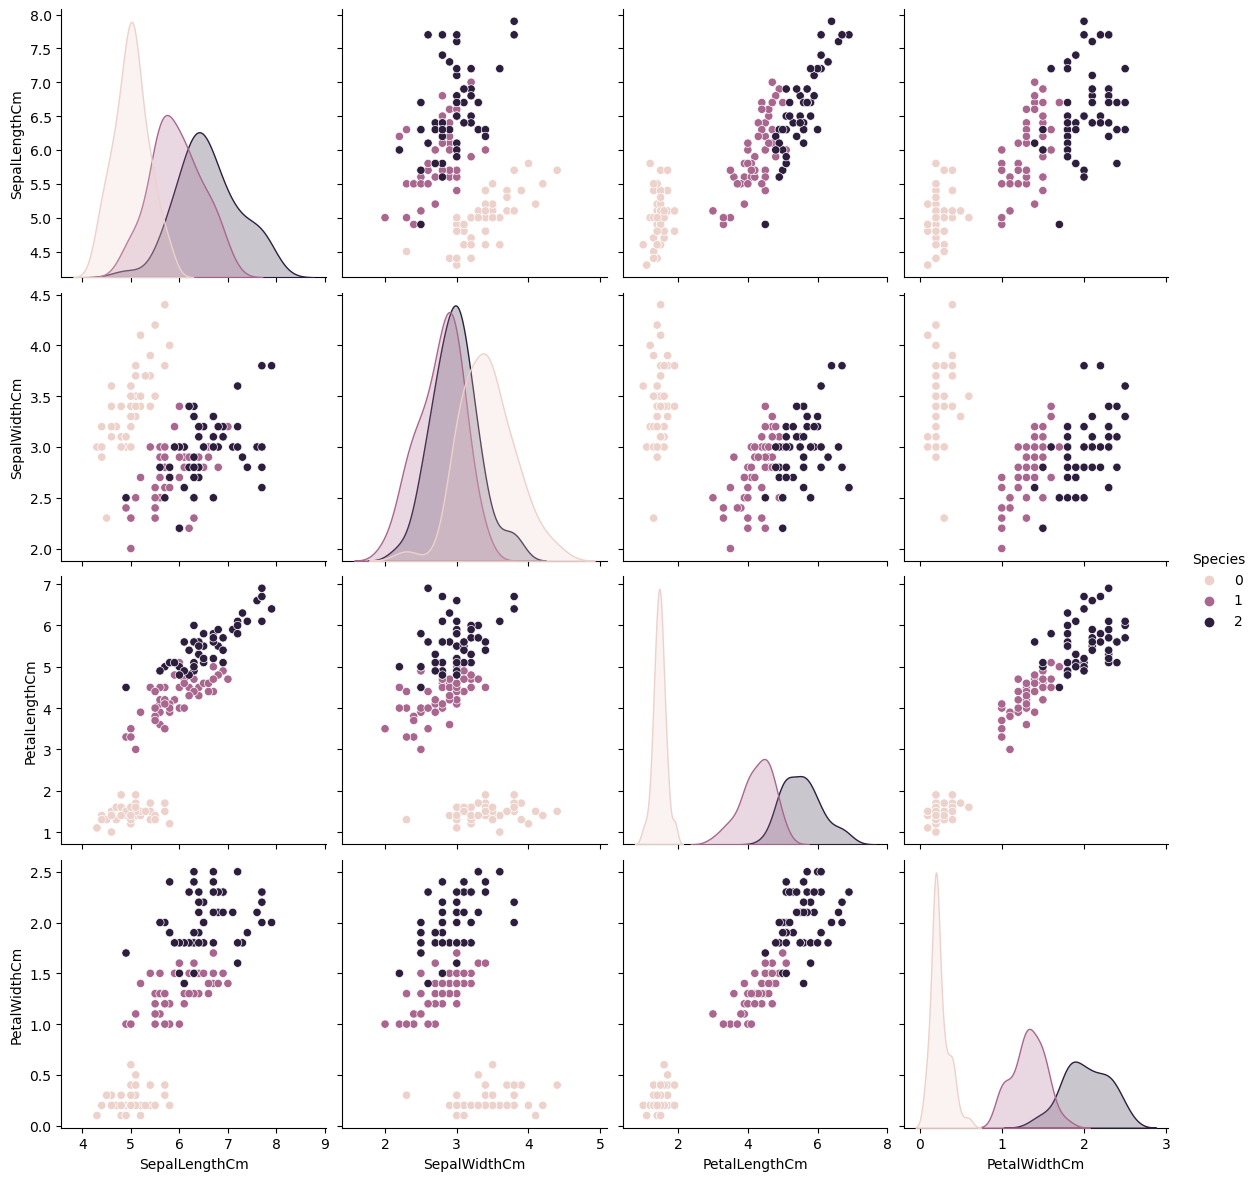

In [33]:
# Pairplot shows the bivariate relation between each pair of features
sns.pairplot(iris, hue='Species', height=3)
plt.show()

**Observation:**
From the pairplot, we can see that the Iris-setosa species is separated from the other two across all feature combinations

### 5.6 Boxplots for Feature Distributions
Boxplots help to visualize the distribution of each feature for each species.

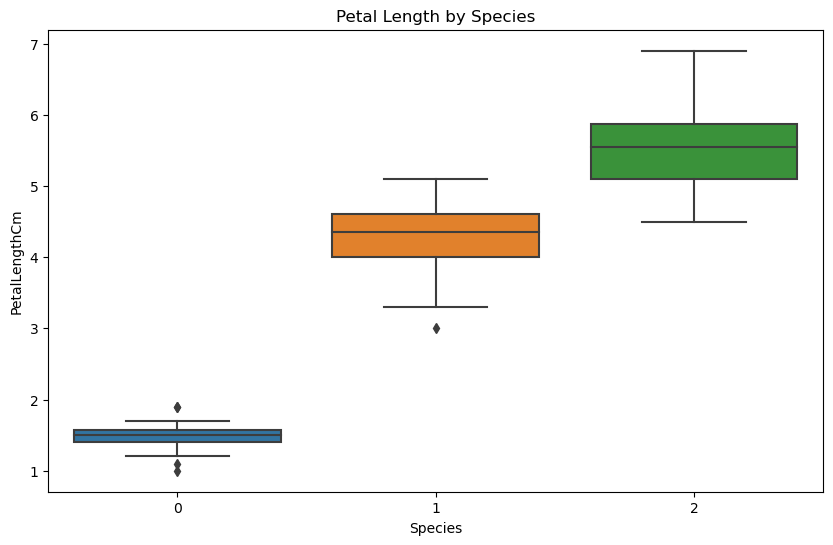

In [34]:
# Boxplot for individual feature (PetalLengthCm)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Petal Length by Species')
plt.show()

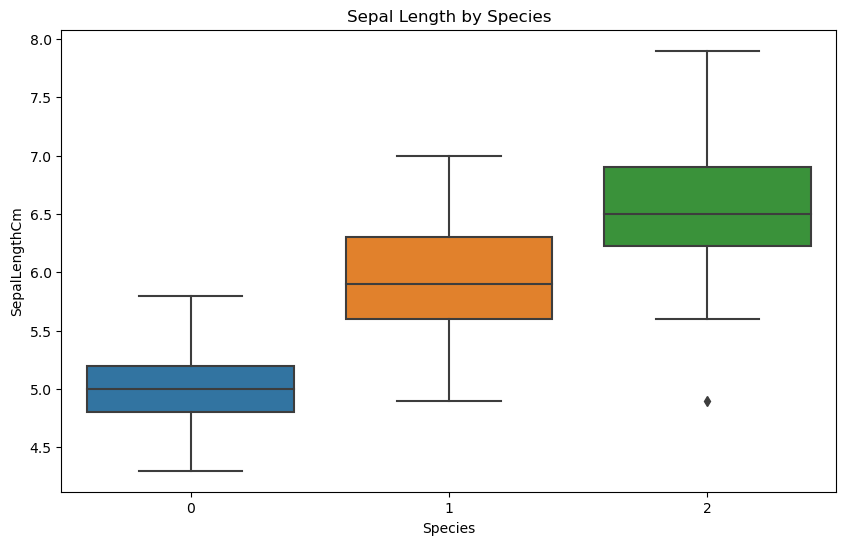

In [35]:
# Boxplot for individual feature (SepalLengthCm)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Sepal Length by Species')
plt.show()

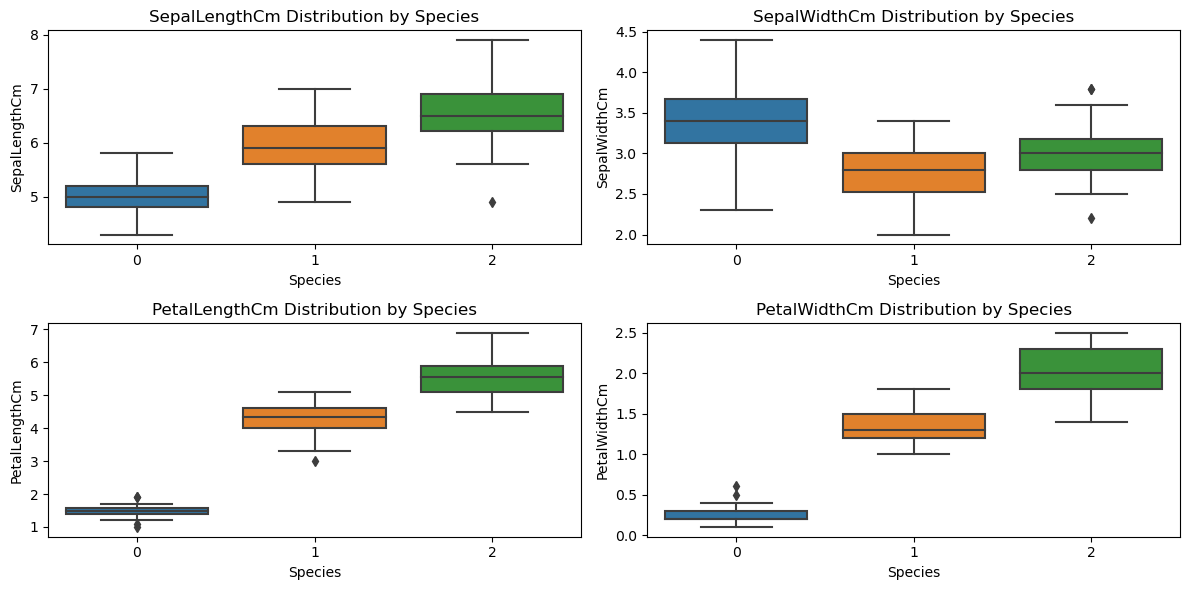

In [36]:
# All Boxplots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=iris)
    plt.title(f'{feature} Distribution by Species')
plt.tight_layout()
plt.show()

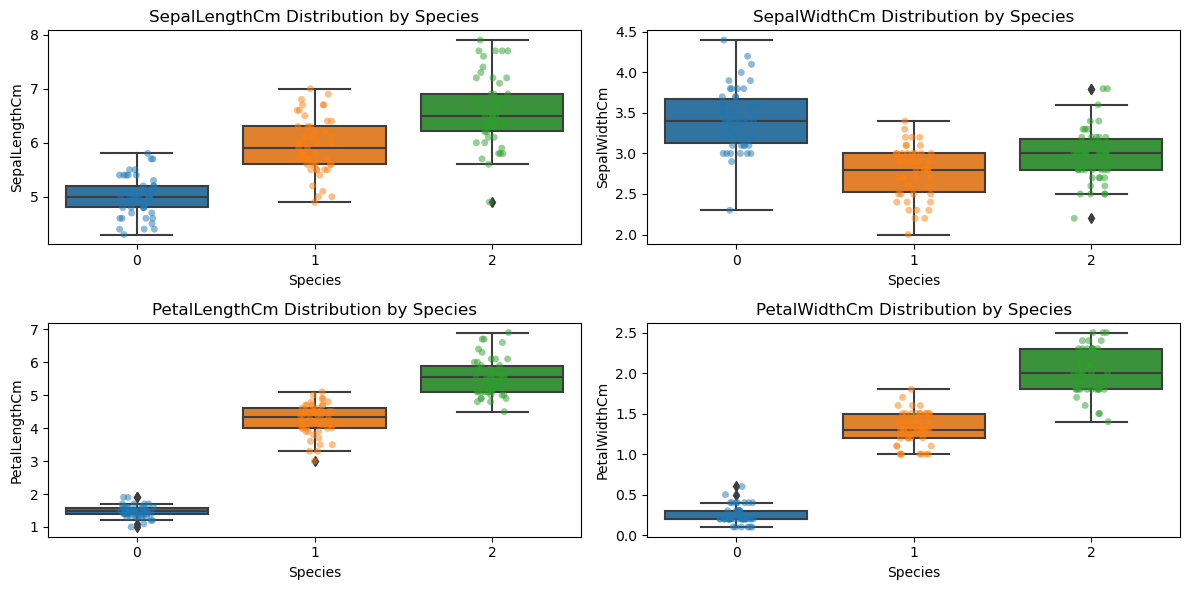

In [37]:
# Boxplots with Stripplot (Individual Points) for Better Visualization
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    
    # Boxplot
    sns.boxplot(x='Species', y=feature, data=iris)
    
    # Stripplot with better visibility
    sns.stripplot(x='Species', y=feature, data=iris, jitter=True, edgecolor="gray", alpha=0.5, dodge=True)
    # 'jitter=True' ensures that all the points don't fall in single vertical lines above the species
    
    plt.title(f'{feature} Distribution by Species')
plt.tight_layout()
plt.show()

By adding the strip plot to the box plot, we can see not only the distribution and spread of the data through the box plot but also the individual data points for each species through the strip plot. This combination provides a more comprehensive view of the data, allowing us to observe potential outliers and variations within each species.

**Why this is better?**

1. **Compact & Reusable:** Avoids repetition by using a loop.
2. **Enhanced Insights:** Combines boxplots with stripplots for better visualization.
3. **Improved Aesthetics:** Uses alpha=0.6 to make stripplot points semi-transparent, avoiding clutter.

### 5.7 Violin Plot
Violin plots are similar to boxplots but also show the kernel density estimation of the feature distribution.
Denser regions of the data are fatter, and sparser thinner in a violin plot.

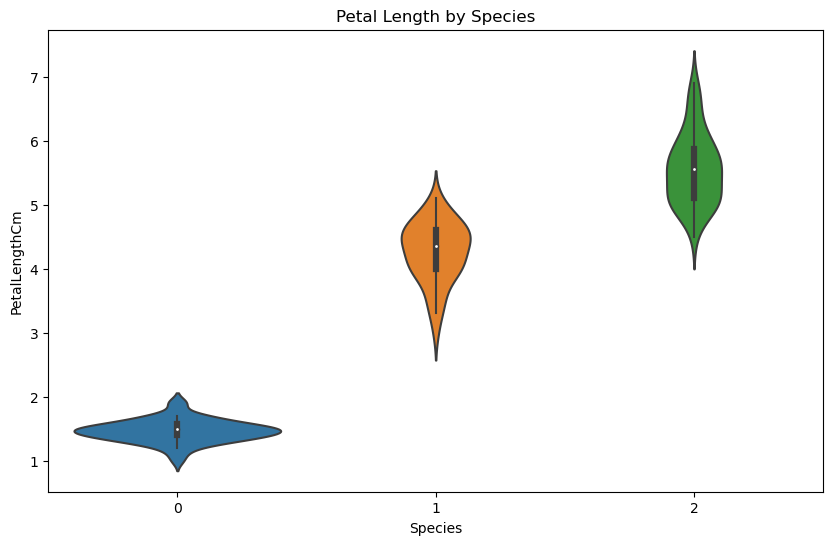

In [38]:
# Violin plot combines the benefits of the previous two plots and simplifies them

plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)
plt.title('Petal Length by Species')
plt.show()

### 5.8 Swarm Plot
Swarm plots show individual data points along with the distribution.

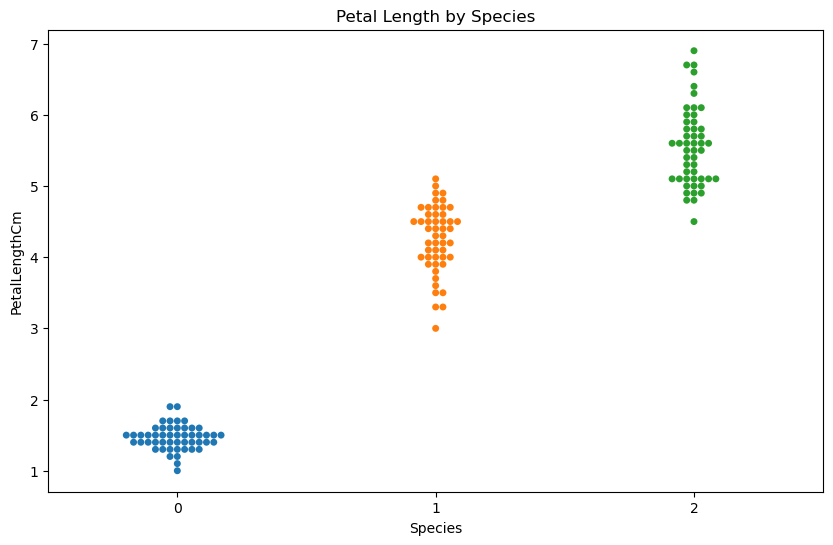

In [39]:
# Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Petal Length by Species')
plt.show()

### 5.9 KDE Plot
A KDE plot is a useful visualization for understanding the probability density of a continuous variable.
A KDE plot creates and visualizes a kernel density estimate of the underlying feature.

A kernel density plot is a form of a graph that uses a single continuous curve to show the distribution of values in a dataset. It is similar to a histogram, but it is better at depicting the shape of distribution.

<Figure size 800x500 with 0 Axes>

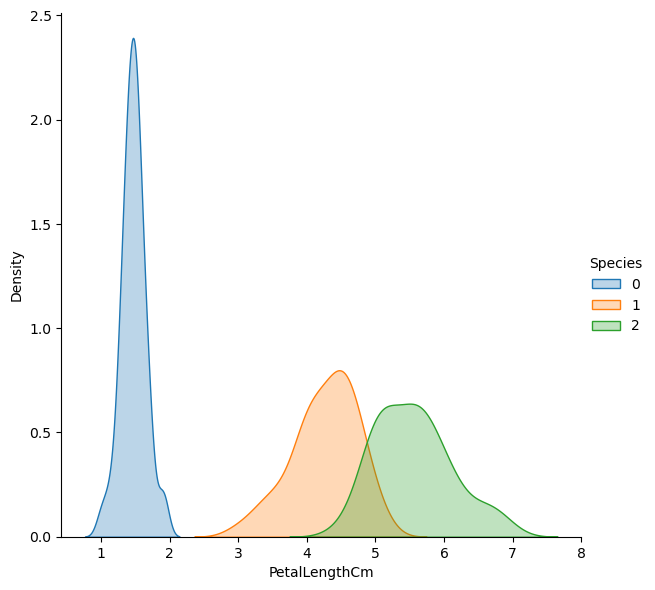

In [40]:
# KDE Plot for Petal Length Distribution by Species
# Using Seaborn's FacetGrid to create multiple KDE plots, one for each species

plt.figure(figsize=(8, 5))  # Set figure size for better visualization

# Create a FacetGrid object, grouping by 'Species' and defining the plot size
g = sns.FacetGrid(iris, hue="Species", height=6) 

# Map a Kernel Density Estimate (KDE) plot to the grid for the 'PetalLengthCm' feature
g.map(sns.kdeplot, "PetalLengthCm", fill=True, alpha=0.3)  # `fill=True` adds shaded area, `alpha=0.4` for transparency

# Add a legend to indicate species
g.add_legend()

# Show the plot
plt.show()

## 6. Machine Learning Models for Classification

In [41]:
# 1. Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [42]:
# 2. Support Vector Machine (SVM)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [43]:
# 3. K-Nearest Neighbors (KNN)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



D:\Downloads\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Overall Observations:**
1. SVM and KNN have perfect accuracy (1.0), which suggests they might be **overfitting**.
2. Random Forest performed slightly worse (0.90), which could mean it didn't capture patterns as effectively.
3. Further testing on a larger dataset or cross-validation would be necessary to confirm model generalizability.

### 6.1 Evaluating Model Performance with Cross-Validation

In [44]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (10 folds) for each model
rf_cv_scores = cross_val_score(rf_model, X, y, cv=10)
svm_cv_scores = cross_val_score(svm_model, X, y, cv=10)
knn_cv_scores = cross_val_score(knn_model, X, y, cv=10)

# Print the mean accuracy and standard deviation for better understanding
print("Random Forest Cross-Val Accuracy:", rf_cv_scores.mean(), "±", rf_cv_scores.std())
print("SVM Cross-Val Accuracy:", svm_cv_scores.mean(), "±", svm_cv_scores.std())
print("KNN Cross-Val Accuracy:", knn_cv_scores.mean(), "±", knn_cv_scores.std())

Random Forest Cross-Val Accuracy: 0.96 ± 0.03265986323710903
SVM Cross-Val Accuracy: 0.9733333333333334 ± 0.04422166387140532
KNN Cross-Val Accuracy: 0.9666666666666668 ± 0.04472135954999579


D:\Downloads\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Downloads\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

### **Observations:**
1. **SVM has the highest mean accuracy (0.9733)** among the three models, indicating that it performs slightly better than the others in terms of predictive power.
2. **KNN and Random Forest follow closely** with mean accuracies of **0.9667 and 0.96**, respectively.
3. **Standard Deviations:**
   - **SVM: ±0.0442**, 
   - **KNN: ±0.0447**, 
   - **Random Forest: ±0.0327**
   
   The lower the standard deviation, the more stable the model across different training folds. Here, **Random Forest has the lowest variance**, suggesting it is the most stable model.

### **Final Decision:**
If computational efficiency is not a concern and the highest accuracy is desired, **go with SVM after hyperparameter tuning**.  
If model stability and interpretability are preferred, **consider Random Forest**.

We will be going ahead with SVM.

### 6.3 Model Optimization: Fine-Tuning SVM for Best Accuracy (Hyperparameter Tuning Using GridSearchCV)
Since SVM has the highest accuracy (0.9733) among the three models, we proceed with Hyperparameter Tuning (GridSearchCV) for SVM to further improve its performance.

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize SVM model
svm_model = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Val Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Val Accuracy: 0.9833333333333334


#### Observations from Hyperparameter Tuning:  

- The **hyperparameter-tuned SVM model achieved the best accuracy (98.33%)**, which is an improvement over the original 97.33%.
- The **SVM model with** `{C: 0.1, gamma: 'scale', kernel: 'linear'}` **is the best performing model** based on cross-validation accuracy.

### 6.4 Final Model Training on Full Dataset

In [46]:
# Train final SVM model with best parameters
final_svm = SVC(C=0.1, gamma='scale', kernel='linear', probability=True)
final_svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True)

### 6.5 Final Model Evaluation on Test (Unseen) Data
Now, let's evaluate the final selected **SVM model** on the test set to confirm generalization.

In [47]:
# Make predictions on test set
y_pred = final_svm.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy:.4f}")

# Classification report for precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Final Test Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Observation:** A small accuracy drop (from 0.9833 → 0.9667) is normal. If the drop was very large, it would indicate overfitting, and we would need regularization or more data. Since F1-score and Precision/Recall are also high, our model is performing well.

## 7. Model Evaluation using Confusion Matrices
Now, visualize model performance using a confusion matrix to check false positives and false negatives.

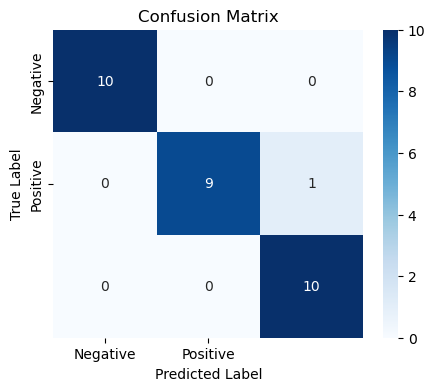

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 8. Deploy the Model

In [49]:
import joblib

# Save model
joblib.dump(final_svm, 'final_svm_model.pkl')

# Load model when needed
loaded_model = joblib.load('final_svm_model.pkl')